<a href="https://colab.research.google.com/github/sheikmohdimran/Experiments_2020/blob/master/NLP/GRC_Sentence_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install flair==0.4.3

     |████████████████████████████████| 184kB 4.8MB/s 
     |████████████████████████████████| 798kB 19.3MB/s 
     |████████████████████████████████| 184kB 26.7MB/s 
     |████████████████████████████████| 1.0MB 24.0MB/s 
     |████████████████████████████████| 778kB 42.9MB/s 
     |████████████████████████████████| 1.0MB 29.9MB/s 
     |████████████████████████████████| 870kB 44.4MB/s 
     |████████████████████████████████| 348kB 48.5MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 2.0.10 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.6.1 which is incompatible.


In [2]:
import torch
from flair.data import Sentence
from flair.embeddings import FlairEmbeddings, DocumentPoolEmbeddings, WordEmbeddings

embeddings = DocumentPoolEmbeddings([WordEmbeddings('glove'), FlairEmbeddings('news-forward'), FlairEmbeddings('news-backward')])


2020-01-07 14:22:29,789 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpfuzx_8e7


100%|██████████| 160000128/160000128 [00:10<00:00, 15774535.65B/s]

2020-01-07 14:22:40,601 copying /tmp/tmpfuzx_8e7 to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2020-01-07 14:22:41,316 removing temp file /tmp/tmpfuzx_8e7
2020-01-07 14:22:41,988 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim not found in cache, downloading to /tmp/tmpokjuv0q7


100%|██████████| 21494764/21494764 [00:02<00:00, 8356603.35B/s]

2020-01-07 14:22:45,239 copying /tmp/tmpokjuv0q7 to cache at /root/.flair/embeddings/glove.gensim
2020-01-07 14:22:45,265 removing temp file /tmp/tmpokjuv0q7



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


2020-01-07 14:22:47,706 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-forward--h2048-l1-d0.05-lr30-0.25-20/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmp4972zmou


100%|██████████| 73034624/73034624 [00:05<00:00, 12301931.64B/s]

2020-01-07 14:22:54,299 copying /tmp/tmp4972zmou to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2020-01-07 14:22:54,399 removing temp file /tmp/tmp4972zmou
2020-01-07 14:22:56,482 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-backward--h2048-l1-d0.05-lr30-0.25-20/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmpe1ivb4oz


100%|██████████| 73034575/73034575 [00:05<00:00, 13318088.05B/s]

2020-01-07 14:23:02,653 copying /tmp/tmpe1ivb4oz to cache at /root/.flair/embeddings/news-backward-0.4.1.pt
2020-01-07 14:23:02,746 removing temp file /tmp/tmpe1ivb4oz


In [0]:
sent_0 = Sentence('contemptuous or contumacious conduct. the person conducting an investigation may report to the occ instances of apparently dilatory, obstructionist, egregious, contemptuous or contumacious conduct on the part of an attorney. after due notice to the attorney, the occ may take such action as the circumstances warrant based upon a written record evidencing the conduct of the attorney in that investigation or such other or additional written or oral presentation as the occ may permit or direct.')
sent_1 = Sentence('purpose this part prescribes standards under which national banks may purchase, sell, deal in, underwrite, and hold securities, consistent with the authority contained in 12 u.s.c. 24 (seventh) and safe and sound banking practices.')
sent_2 = Sentence('an obligation supported exclusively by excise taxes or license fees is not a general obligation for the purposes of 12 u.s.c. 24 (seventh). nevertheless, an obligation that is primarily payable from a fund consisting of excise taxes or other pledged revenues qualifies as a â€œgeneral obligation,â€ if, in the event of a deficiency of those revenues, the obligation is also supported by the general revenues of a state or a political subdivision possessing general powers of taxation.')
sent_3 = Sentence('type iv securities. a national bank may purchase and sell type iv securities for its own account. the amount of the type iv securities that a bank may purchase and sell is not limited to a specified percentage of the banks capital and surplus.')
sent_4 = Sentence('all formal examination proceedings shall be private and, unless otherwise ordered by the occ, all investigative proceedings shall also be private. unless otherwise ordered or permitted by the occ, or required by law, and except as provided in Â§Â§ 112.4 and 112.5, the entire record of any investigative proceeding or formal examination proceeding, including the resolution of the occ or its delegate(s) authorizing the proceeding, the transcript of such proceeding, and all documents and information obtained by the designated representative(s) during the course of said proceedings shall be confidential.')

In [0]:
embeddings.embed([sent_0, sent_1, sent_2, sent_3, sent_4])
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)

In [0]:
embed_matrix = torch.cat([sent_0.embedding.unsqueeze(0),sent_1.embedding.unsqueeze(0),sent_2.embedding.unsqueeze(0),
                          sent_3.embedding.unsqueeze(0),sent_4.embedding.unsqueeze(0)])

In [40]:
def sim_matrix(a, b, eps=1e-6):
    """
    added eps for numerical stability
    """
    a_n, b_n = a.norm(dim=1)[:, None], b.norm(dim=1)[:, None]
    a_norm = a / torch.max(a_n, eps * torch.ones_like(a_n))
    b_norm = b / torch.max(b_n, eps * torch.ones_like(b_n))
    sim_mt = torch.mm(a_norm, b_norm.transpose(0, 1))
    return sim_mt

sim_matrix(embed_matrix,embed_matrix).detach().numpy()


array([[1.000005  , 0.88224   , 0.89683425, 0.84686166, 0.9307657 ],
       [0.88224   , 1.000003  , 0.9068546 , 0.89638186, 0.90678316],
       [0.89683425, 0.9068546 , 1.0000026 , 0.91743577, 0.90952814],
       [0.84686166, 0.89638186, 0.91743577, 1.0000043 , 0.8461291 ],
       [0.9307657 , 0.90678316, 0.90952814, 0.8461291 , 1.0000033 ]],
      dtype=float32)

In [32]:
# Check Similarity
sim_1 = cos(sent_1.embedding, sent_2.embedding)
print(sim_1)

tensor(0.9069, grad_fn=<DivBackward0>)


In [0]:
messages = ['sent_0','sent_1','sent_2','sent_3','sent_4']

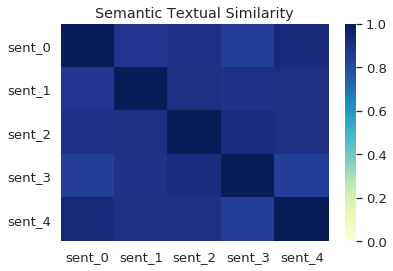

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def plot_similarity(labels, features, rotation):
    corr = sim_matrix(features,features).detach().numpy()
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlGnBu")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

plot_similarity(messages, embed_matrix, 0)
